<div style=" background-color: RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 CRUDER LEA</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec R ou Python
</h2>

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies, chargement des fichiers et détection des anomalies</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.1 - Importation des librairies</h3>

In [1]:
# Importation des librairies 

import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.2 - Chargement des fichiers Excel</h3>

In [2]:
# Importation du fichier ERP

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=UserWarning)
    fichierERP = pd.read_excel('./Fichier_ERP.xlsx')

In [3]:
fichierERP.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
# Importation du fichier web

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=UserWarning)
    fichierWeb = pd.read_excel('./Fichier_Web.xlsx')

In [5]:
fichierWeb.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [6]:
# Importation du fichier liaison

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=UserWarning)
    fichierLiaison = pd.read_excel('./Fichier_liaison.xlsx')

In [7]:
fichierLiaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.3 - Incohérences détectées dans les données</h3>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 14px; color: RGB(173,40,59); ">Dans le fichier ERP</h3>

In [8]:
#1 Des prix négatifs

fichierERP.loc[fichierERP['price'] <= 0 ,('product_id', 'price')]

,product_id,price
469,5017,-8.0
739,6594,-1.0


In [9]:
#2 Des stocks négatifs

fichierERP.loc[fichierERP['stock_quantity'] < 0 ,:]

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 14px; color: RGB(173,40,59); ">Dans le fichier Web</h3>

In [10]:
#3 Présence de doublons (aussi bien sur la clé SKU que sur des lignes entières) 

print("Il y a {} doublons sur la clé SKU".format(fichierWeb['sku'].duplicated().sum()), 
      "et {} lignes en double.".format(fichierWeb.duplicated().sum()))

Il y a 798 doublons sur la clé SKU et 82 lignes en double.


In [11]:
#4 Présence de valeurs nulles 

print((fichierWeb.isna()).sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 14px; color: RGB(173,40,59); ">Dans le fichier Liaison</h3>

In [12]:
#5 Correspondances manquantes : 91 id_web en NaN (correspondant au SKU)

print(fichierLiaison.isna().sum())

product_id     0
id_web        91
dtype: int64


<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.1 - Analyse exploratoire du fichier ERP</h3>

In [13]:
# Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(fichierERP.shape[0]))
print("Le tableau comporte {} colonne(s)".format(fichierERP.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [14]:
# Affichage des infos du dataset

fichierERP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [15]:
# Recherche de valeurs aberrantes

fichierERP.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [16]:
# Changement de nom des colonnes

fichierERP.rename(columns = {'product_id':'id_produit', 'onsale_web':'vente_en_ligne',
                             'price':'prix','stock_quantity':'qte_en_stock','stock_status':'statut_stock'}, inplace=True)

In [17]:
# Recherche de doublons

fichierERP['id_produit'].unique().shape[0]

825

In [18]:
# Filtrage des valeurs positives dans une copie

fichierERP2 = fichierERP[fichierERP['prix'] >= 0 ]
fichierERP2.head()

,id_produit,vente_en_ligne,prix,qte_en_stock,statut_stock
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [19]:
# Vérification de la nature de "vente_en_ligne"  -> booléen

fichierERP2['vente_en_ligne'].unique().shape[0]

2

In [20]:
# Récupération des données qui ne concernent que les ventes sur le site

fichierERPsite = fichierERP2[fichierERP2['vente_en_ligne']==1]
fichierERPsite.head()

,id_produit,vente_en_ligne,prix,qte_en_stock,statut_stock
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [21]:
# Vérification

fichierERPsite['vente_en_ligne'].unique().shape[0]

1

In [22]:
# Suppresion colonnes inutiles

fichierERPsite = fichierERPsite.drop(columns={'statut_stock','qte_en_stock','vente_en_ligne'})

In [23]:
# Affichage 

fichierERPsite

,id_produit,prix
0,3847,24.2
1,3849,34.3
2,3850,20.8
3,4032,14.1
4,4039,46.0
...,...,...
787,6930,8.4
792,7023,27.5
793,7025,69.0
822,7247,54.8


In [24]:
# Comptage des valeurs uniques

fichierERPsite['id_produit'].unique().shape[0]

717

In [25]:
# Vérification de l'unicité de la clé id_produit

print((fichierERPsite['id_produit'].duplicated()).sum())

0


In [26]:
# Vérification des valeurs nulles

fichierERPsite.isna().sum()

id_produit    0
prix          0
dtype: int64

In [27]:
# Affichage des infos du dataset

fichierERPsite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_produit  717 non-null    int64  
 1   prix        717 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.1 - Analyse exploratoire du fichier web</h3>

In [28]:
# Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(fichierWeb.shape[0]))
print("Le tableau comporte {} colonne(s)".format(fichierWeb.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


In [29]:
# Affichage des infos du dataset

fichierWeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [30]:
# Recherche de valeurs aberrantes

fichierWeb.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,3.855245,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,7.702346,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [31]:
# Recherche de doublons

fichierWeb['sku'].unique().shape[0]

715

In [32]:
# Affichage du nombre de doublons

print((fichierWeb.duplicated()).sum())

82


In [33]:
# Exploration des doublons

fichierWeb.loc[fichierWeb[['sku','total_sales','post_title','post_date_gmt']].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [34]:
# Suppression des doublons 

fichierWeb.drop_duplicates(subset =['sku','total_sales','post_title','post_date_gmt'], inplace = True, ignore_index=True)

In [35]:
# Vérification

print(fichierWeb.duplicated().sum())

0


In [36]:
# Suppression des colonnes inutiles 

fichierWeb.drop(fichierWeb.columns.difference(['sku', 'total_sales', 'post_title']), axis = 1, inplace = True)


In [37]:
# Affichage des 5 premières lignes

fichierWeb.head()

,sku,total_sales,post_title
0,16004,5.0,Château du Couvent Pomerol 2017
1,NaN,NaN,NaN
2,15075,3.0,Parés Baltà Penedès Indigena 2017
3,16209,6.0,Maurel Cabardès Tradition 2017
4,15763,1.0,Domaine de la Monardière Vacqueyras Vieilles V...


In [38]:
# Affichage des infos du dataset

fichierWeb.info

<bound method DataFrame.info of        sku  total_sales                                         post_title
0    16004          5.0                    Château du Couvent Pomerol 2017
1      NaN          NaN                                                NaN
2    15075          3.0                  Parés Baltà Penedès Indigena 2017
3    16209          6.0                     Maurel Cabardès Tradition 2017
4    15763          1.0  Domaine de la Monardière Vacqueyras Vieilles V...
..     ...          ...                                                ...
715  15575          6.0               Château Plaisance Fronton Rouge 2017
716  15857          0.0    Domaine de Montbourgeau L'Etoile En Banode 2016
717  16011          0.0  Nouvelle-Zélande Marlborough Momo Pinot Noir 2016
718  15180          1.0                 Camille Giroud Santenay Rouge 2016
719   1662         87.0                        Champagne Gosset Grand Rosé

[720 rows x 3 columns]>

In [39]:
# Recherche des valeurs nulles

fichierWeb.isna().sum()

sku            3
total_sales    1
post_title     1
dtype: int64

In [40]:
# Suppression des valeurs nulles sur la colonne sku 

fichierWeb=fichierWeb.dropna(subset=['sku'])

In [41]:
# Suppression des valeurs nulles sur la colonne total_sales

fichierWeb=fichierWeb.dropna(subset=['total_sales'])

In [42]:
# Vérification de la clé

fichierWeb.loc[fichierWeb['sku'].duplicated(keep=False),:]

,sku,total_sales,post_title
68,16416,2.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019
529,7818,96.0,Champagne Gosset Grand Blanc de Blancs
629,7818,6.0,Champagne Gosset Grand Blanc de Blancs
654,1662,7.0,Champagne Gosset Grand Rosé
664,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019
719,1662,87.0,Champagne Gosset Grand Rosé


In [43]:
# Suppression manuelle des doublons restants (puisqu'il s'agit de la somme des ventes, le plus logique est la plus grande)

fichierWeb.drop([68,629,654], axis=0, inplace=True)


In [44]:
# Changement de nom des colonnes

fichierWeb.rename(columns = {'sku':'SKU', 'post_title':'nom_produit','total_sales':'total_ventes'}, inplace=True)

In [45]:
# Affichage des 5 premières lignes

fichierWeb.head()

,SKU,total_ventes,nom_produit
0,16004,5.0,Château du Couvent Pomerol 2017
2,15075,3.0,Parés Baltà Penedès Indigena 2017
3,16209,6.0,Maurel Cabardès Tradition 2017
4,15763,1.0,Domaine de la Monardière Vacqueyras Vieilles V...
5,13895,0.0,Château Saransot-Dupré Bordeaux Blanc 2016


In [46]:
# Vérification de la clé

fichierWeb['SKU'].unique().shape[0]

714

In [47]:
# Vérification de l'unicité de la clé SKU

print((fichierWeb['SKU'].duplicated()).sum())

0


In [48]:
# Affichage des infos du dataset

fichierWeb.info

<bound method DataFrame.info of        SKU  total_ventes                                        nom_produit
0    16004           5.0                    Château du Couvent Pomerol 2017
2    15075           3.0                  Parés Baltà Penedès Indigena 2017
3    16209           6.0                     Maurel Cabardès Tradition 2017
4    15763           1.0  Domaine de la Monardière Vacqueyras Vieilles V...
5    13895           0.0         Château Saransot-Dupré Bordeaux Blanc 2016
..     ...           ...                                                ...
715  15575           6.0               Château Plaisance Fronton Rouge 2017
716  15857           0.0    Domaine de Montbourgeau L'Etoile En Banode 2016
717  16011           0.0  Nouvelle-Zélande Marlborough Momo Pinot Noir 2016
718  15180           1.0                 Camille Giroud Santenay Rouge 2016
719   1662          87.0                        Champagne Gosset Grand Rosé

[714 rows x 3 columns]>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.3 - Analyse exploratoire du fichier liaison</h3>

In [49]:
# Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(fichierLiaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(fichierLiaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [50]:
# Affichage des infos du dataset

fichierLiaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [51]:
# Recherche de valeurs aberrantes

fichierLiaison.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


In [52]:
# Comptage des valeurs uniques

fichierLiaison['product_id'].unique().shape[0]

825

In [53]:
# Comptage des valeurs uniques

fichierLiaison['id_web'].unique().shape[0]

735

In [54]:
# Changement de nom des colonnes

fichierLiaison.rename(columns = {'id_web':'SKU','product_id':'id_produit'}, inplace=True)

In [55]:
# Vérification de l'unicité de la clé id_produit

print((fichierLiaison['id_produit'].duplicated()).sum())

0


In [56]:
# Vérification de l'unicité de la clé SKU

print((fichierLiaison['SKU'].duplicated()).sum())

90


In [57]:
# Affichage des doublons

fichierLiaison.loc[fichierLiaison['SKU'].duplicated(keep=False),:]

,id_produit,SKU
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [58]:
# Suppression des doublons 

fichierLiaison.drop_duplicates(subset =['SKU'], inplace = True, ignore_index=True)

In [59]:
# Vérification de l'unicité de la clé SKU

print((fichierLiaison['SKU'].duplicated()).sum())

0


In [60]:
# Vérification des valeurs nulles

fichierLiaison.isna().sum()

id_produit    0
SKU           1
dtype: int64

In [61]:
# Suppression des SKU manquants

fichierLiaison=fichierLiaison.dropna(subset=['SKU'])

In [62]:
# Affichage des 5 premières lignes

fichierLiaison.head()

,id_produit,SKU
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [63]:
# Affichage du dataset

fichierLiaison

,id_produit,SKU
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
730,7023,15891
731,7025,15887
732,7247,13127-1
733,7329,14680-1


In [64]:
# Affichage des infos du dataset

fichierLiaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 734
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_produit  734 non-null    int64 
 1   SKU         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointures</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.1 - Jointure du fichier liaison au fichier ERP</h3>

In [65]:
# Création du dataframe

df1 = fichierERPsite.merge(fichierLiaison, on='id_produit', how='inner')

In [66]:
# Affichage

df1

,id_produit,prix,SKU
0,3847,24.2,15298
1,3849,34.3,15296
2,3850,20.8,15300
3,4032,14.1,19814
4,4039,46.0,19815
...,...,...,...
709,6930,8.4,16135
710,7023,27.5,15891
711,7025,69.0,15887
712,7247,54.8,13127-1


In [67]:
# Affichage des infos du dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_produit  714 non-null    int64  
 1   prix        714 non-null    float64
 2   SKU         714 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 22.3+ KB


In [68]:
# Comptage des valeurs uniques

df1['SKU'].unique().shape[0]

714

In [69]:
# Comptage des valeurs uniques

df1['id_produit'].unique().shape[0]

714

In [70]:
# Affichage des infos du dataset

df1.info

<bound method DataFrame.info of      id_produit  prix      SKU
0          3847  24.2    15298
1          3849  34.3    15296
2          3850  20.8    15300
3          4032  14.1    19814
4          4039  46.0    19815
..          ...   ...      ...
709        6930   8.4    16135
710        7023  27.5    15891
711        7025  69.0    15887
712        7247  54.8  13127-1
713        7338  16.3    16230

[714 rows x 3 columns]>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.2 - Jointure avec le fichier Web</h3>

In [71]:
# Création du dataframe

df2 = df1.merge(fichierWeb, on='SKU', how='inner')

In [72]:
# Affichage

df2

,id_produit,prix,SKU,total_ventes,nom_produit
0,3847,24.2,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,34.3,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,20.8,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,14.1,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,46.0,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017
...,...,...,...,...,...
709,6930,8.4,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015
710,7023,27.5,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018
711,7025,69.0,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018
712,7247,54.8,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


In [73]:
# Affichage des infos du dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_produit    714 non-null    int64  
 1   prix          714 non-null    float64
 2   SKU           714 non-null    object 
 3   total_ventes  714 non-null    float64
 4   nom_produit   714 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.5+ KB


In [74]:
# Comptage des valeurs uniques

df2['id_produit'].unique().shape[0]

714

In [75]:
# Comptage des valeurs uniques

df2['SKU'].unique().shape[0]

714

In [76]:
# Vérification des valeurs nulles

df2.isna().sum()

id_produit      0
prix            0
SKU             0
total_ventes    0
nom_produit     0
dtype: int64

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Calcul des chiffres d'affaires</h2>

In [77]:
# Calcul du CA par produit

df2['CA_total_produit'] = df2['total_ventes']*df2['prix']
df2.head()

,id_produit,prix,SKU,total_ventes,nom_produit,CA_total_produit
0,3847,24.2,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,145.2
1,3849,34.3,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0
2,3850,20.8,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0
3,4032,14.1,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3
4,4039,46.0,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0


In [78]:
# Calcul du CA en ligne

CA_total_en_ligne = sum(df2['CA_total_produit'])
print("Le chiffre d'affaires total réalisé en ligne est de {:,} € ".format(CA_total_en_ligne))

Le chiffre d'affaires total réalisé en ligne est de 70,568.6 € 


In [79]:
# Nombre de ventes

total_ventes_web = sum(df2['total_ventes'])
print(total_ventes_web)

2865.0


In [80]:
# Création d'un dataframe pour exportation sur excel

Ventes_en_ligne = df2[df2['total_ventes']>0]

print(Ventes_en_ligne)

     id_produit  prix    SKU  total_ventes  \
0          3847  24.2  15298           6.0   
3          4032  14.1  19814           3.0   
7          4042  31.2  16042           7.0   
8          4043  60.0  14980           3.0   
9          4045  42.6  16041          14.0   
..          ...   ...    ...           ...   
698        6665  27.7  16068           1.0   
700        6738  15.4   8193           3.0   
707        6926  49.9  15845           1.0   
708        6928  19.0  15741           2.0   
709        6930   8.4  16135           5.0   

                                           nom_produit  CA_total_produit  
0          Pierre Jean Villa Saint-Joseph Préface 2018             145.2  
3    Pierre Jean Villa IGP Collines Rhodaniennes Ga...              42.3  
7                          Pierre Gaillard Cornas 2017             218.4  
8     Pierre Gaillard Côte Rôtie Esprit de Blonde 2017             180.0  
9                      Pierre Gaillard Côte Rôtie 2018             596.4

In [81]:
# Exportation sur Excel 

file_name = 'Ventes_en_ligne.xlsx' 
Ventes_en_ligne.to_excel(file_name)


In [82]:
# Affichage du top 10

df2.sort_values('CA_total_produit',ascending=False).head(10)

,id_produit,prix,SKU,total_ventes,nom_produit,CA_total_produit
194,4334,49.0,7818,96.0,Champagne Gosset Grand Blanc de Blancs,4704.0
71,4144,49.0,1662,87.0,Champagne Gosset Grand Rosé,4263.0
218,4402,176.0,3510,13.0,Cognac Frapin VIP XO,2288.0
70,4142,53.0,11641,30.0,Champagne Gosset Grand Millésime 2006,1590.0
69,4141,39.0,304,40.0,Champagne Gosset Grande Réserve,1560.0
201,4355,126.5,12589,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5
199,4352,225.0,15940,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0
79,4153,29.0,16237,36.0,Elian Daros Côtes du Marmandais Clos Baquey 2015,1044.0
651,6206,25.2,16580,41.0,Domaine Giudicelli Patrimonio Blanc 2019,1033.2
30,4068,16.6,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.2


In [83]:
# Affichage des 10 + vendus

df2.sort_values('total_ventes',ascending=False).head(10)

,id_produit,prix,SKU,total_ventes,nom_produit,CA_total_produit
194,4334,49.0,7818,96.0,Champagne Gosset Grand Blanc de Blancs,4704.0
71,4144,49.0,1662,87.0,Champagne Gosset Grand Rosé,4263.0
30,4068,16.6,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.2
119,4200,5.8,16295,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,266.8
97,4172,5.7,16210,43.0,Maurel Pays d'Oc Chardonnay 2019,245.1
109,4187,13.3,16189,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas...,558.6
651,6206,25.2,16580,41.0,Domaine Giudicelli Patrimonio Blanc 2019,1033.2
69,4141,39.0,304,40.0,Champagne Gosset Grande Réserve,1560.0
625,6047,10.9,16264,38.0,Château de La Liquière Faugères L'Ampoule 2019,414.2
324,4729,8.6,38,38.0,Emile Boeckel Crémant Brut Blanc de Blancs,326.8


<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse de la variable prix</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.1 - Analyse exploratoire</h3>

In [84]:
# Recherche de valeurs aberrantes

fichierERP.describe()

,id_produit,vente_en_ligne,prix,qte_en_stock
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [85]:
# Création d'un dataframe pour les prix <= 0 

dfnegatif = fichierERP.loc[fichierERP['prix'] <= 0 ,('id_produit', 'prix')]
dfnegatif.head()

,id_produit,prix
469,5017,-8.0
739,6594,-1.0


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.2 - Analyse de la distribution et mesure de la tendance centrale</h3>

In [86]:
# Récupération des prix sans les valeurs négatives

df3 = fichierERP.loc[fichierERP['prix'] > 0 ,('id_produit', 'prix')]

In [87]:
# Comptage des valeurs

prix = df3['prix']
effectifs = prix.value_counts()
modalites = effectifs.index
effectifs.head()

45.0    15
31.0    13
19.0     9
13.5     8
40.0     8
Name: prix, dtype: int64

In [88]:
# Création d'un dataframe 

df4 = pd.DataFrame(modalites, columns = ['prix'])
df4.head()

,prix
0,45.0
1,31.0
2,19.0
3,13.5
4,40.0


In [89]:
# Affichage des infos

df4.info

<bound method DataFrame.info of      prix
0    45.0
1    31.0
2    19.0
3    13.5
4    40.0
..    ...
375  17.3
376  37.2
377   9.4
378  27.2
379   8.4

[380 rows x 1 columns]>

In [90]:
# Ajout des effectifs dans le DF

df4['effectifs'] = effectifs.values
df4.head()

,prix,effectifs
0,45.0,15
1,31.0,13
2,19.0,9
3,13.5,8
4,40.0,8


In [91]:
# Calcul et ajout de la fréquence

df4['frequence'] = df4['effectifs'] / len(prix)
df4.head()

,prix,effectifs,frequence
0,45.0,15,0.018226
1,31.0,13,0.015796
2,19.0,9,0.010936
3,13.5,8,0.009721
4,40.0,8,0.009721


In [92]:
# Affichage du mode (prix le plus fréquent)

df4.sort_values('effectifs',ascending=False).head()

,prix,effectifs,frequence
0,45.0,15,0.018226
1,31.0,13,0.015796
2,19.0,9,0.010936
3,13.5,8,0.009721
4,40.0,8,0.009721


In [93]:
# Affichage du dataset

df4

,prix,effectifs,frequence
0,45.0,15,0.018226
1,31.0,13,0.015796
2,19.0,9,0.010936
3,13.5,8,0.009721
4,40.0,8,0.009721
...,...,...,...
375,17.3,1,0.001215
376,37.2,1,0.001215
377,9.4,1,0.001215
378,27.2,1,0.001215


In [94]:
# Vérification et calcul du mode (prix le plus fréquent)

df3['prix'].mode()

0    45.0
Name: prix, dtype: float64

In [95]:
# Calcul de la moyenne

df3['prix'].mean()

32.47363304981774

In [96]:
# Tri pour calcul de la médiane

df3 = df3.sort_values(['prix'],ascending=True)
df3 = df3.reset_index(drop=True)
display(df3)

,id_produit,prix
0,6129,5.2
1,4173,5.7
2,5777,5.7
3,4172,5.7
4,4174,5.7
...,...,...
818,5767,175.0
819,4402,176.0
820,5892,191.3
821,5001,217.5


In [97]:
# Calcul de la médiane 

df3['prix'].median()

24.4

In [98]:
# Vérification

df3.loc[412]

id_produit    4920.0
prix            24.4
Name: 412, dtype: float64

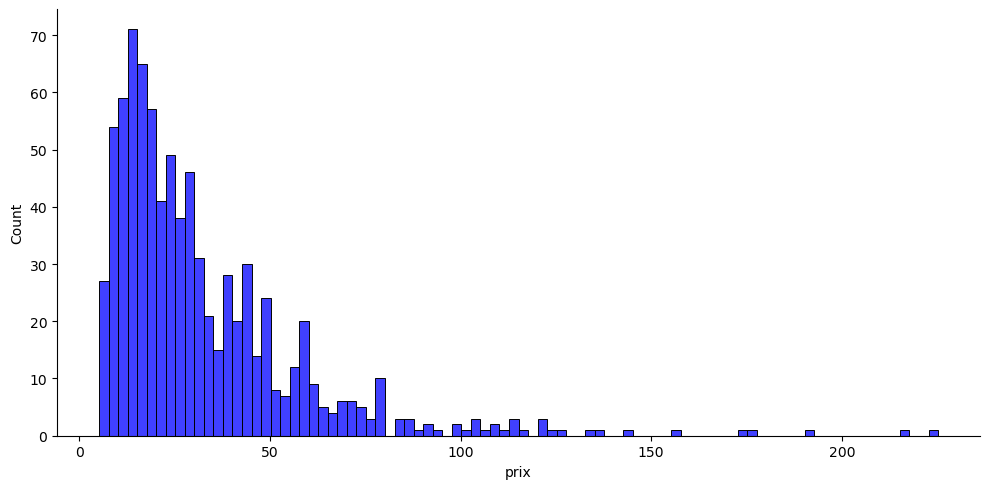

In [99]:
# Visualisation de la distribution avec un histogramme

sns.displot(df3['prix'], color = 'blue', kind = 'hist', binwidth = 2.5, aspect = 2)

Ici, on n'a qu'un seul pic : distribution unimodale

La médiane est de 24.4 et la moyenne est de 32.47

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.3 - Mesures de forme de la distribution</h3>

In [100]:
# Mesure d'asymétrie avec le calcul du skewness empirique

df3['prix'].skew()

2.6224515414240686

->  supérieur à 0 donc la distribution est biaisée sur la droite

Grâce à ce calcul, nous savons que la majeure partie des valeurs se trouvent sur la gauche et les outliers sont à droite

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.4 - Mesures de dispersion</h3>

In [101]:
# Rappel de la moyenne

df3['prix'].mean()

32.47363304981774

In [102]:
# Calcul de la variance empirique

df3['prix'].var()

718.3746202398797

In [103]:
# Calcul de la variance empirique sans biais

df3['prix'].var(ddof=0)

717.5017470682639

In [104]:
# Calcul de l'écart-type empirique

df3['prix'].std()

26.802511453964154

In [105]:
# Coefficient de variation 

df3['prix'].std()/df3['prix'].mean()

0.825362268916646

Méthode non gardée pour détecter les valeurs aberrantes, car dépendante de la moyenne, qui est elle-même influencée par les valeurs extrèmes

In [106]:
# Affichage des infos du dataset

df3.describe()

,id_produit,prix
count,823.000000,823.000000
mean,5161.035237,32.473633
std,902.346337,26.802511
min,3847.000000,5.200000
25%,4342.500000,14.650000
50%,4904.000000,24.400000
75%,5804.500000,42.050000
max,7338.000000,225.000000


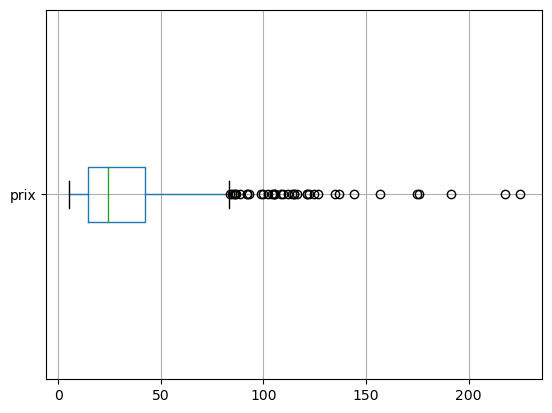

In [107]:
# Visualisation de la distribution avec la boîte à moustache 


df3.boxplot(column='prix', vert=False,)
plt.show()

Ici, nous pouvons constater que les données sur les prix sont faussées sur la droite, donc il existe beaucoup de valeurs extrêmes, dont certaines sont probablement aberrantes.

In [108]:
# Calcul des quantiles

q1=df3['prix'].quantile(q=0.25)
q3=df3['prix'].quantile(q=0.75)

In [109]:
q1

14.649999999999999

In [110]:
q3

42.05

In [111]:
# Calcul de l'écart inter-quartile

IQR = q3-q1

In [112]:
IQR

27.4

In [113]:
# Calcul des bornes inférieure et supérieure

borne_inf = q1-1.5*IQR
borne_sup = q3+1.5*IQR

In [114]:
borne_sup

83.14999999999999

In [115]:
# Tri des valeurs entre les bornes

dfbox = df3[(df3['prix']<borne_sup) & (df3['prix']>borne_inf)]

dfbox

,id_produit,prix
0,6129,5.2
1,4173,5.7
2,5777,5.7
3,4172,5.7
4,4174,5.7
...,...,...
781,4350,79.5
782,4353,79.5
783,4210,79.8
784,4046,80.0


In [116]:
# Création d'un dataframe des valeurs aberrantes avec ajout des 2 prix négatifs

dfextremes = df3[(df3['prix']>borne_sup) | (df3['prix']<borne_inf)]
dfoutliers = pd.concat([dfnegatif, dfextremes], axis=0)

dfoutliers.head()

,id_produit,prix
469,5017,-8.0
739,6594,-1.0
786,5580,83.7
787,5070,84.7
788,4359,85.6


In [117]:
# Tri des valeurs aberrantes et affichage du df

dfoutliers.sort_values('prix',ascending=True)

,id_produit,prix
469,5017,-8.0
739,6594,-1.0
786,5580,83.7
787,5070,84.7
788,4359,85.6
789,4055,86.1
790,5026,86.8
791,4132,88.4
793,6324,92.0
792,5565,92.0


In [118]:
# Affichage des infos

dfoutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 469 to 822
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_produit  39 non-null     int64  
 1   prix        39 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 936.0 bytes


<Axes: >

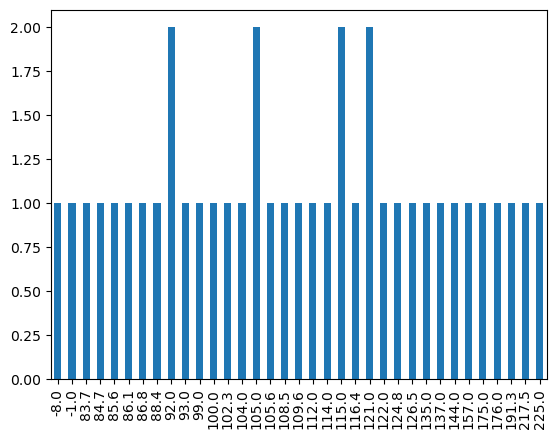

In [119]:
# Diagramme en bâtons des valeurs aberrantes avec value counts

dfoutliers.prix.value_counts()[dfoutliers.prix.unique()].plot(kind='bar')

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Conclusion </h2>

In [120]:
# Affichage des outliers

dfoutliers

,id_produit,prix
469,5017,-8.0
739,6594,-1.0
786,5580,83.7
787,5070,84.7
788,4359,85.6
789,4055,86.1
790,5026,86.8
791,4132,88.4
792,5565,92.0
793,6324,92.0


39 valeurs aberrantes trouvées 

Il n'est bien sûr pas certain que ce sont bien toutes des erreurs, mais il faut le confirmer.

Il serait intéressant de mettre en place une détection d'erreurs de saisie potentielle pour toute valeur <0€ ou >83.15€ dans la future solution centralisée. 